In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_df = pd.read_csv('/content/archive (45).zip')
ptbxl_df = pd.read_csv('/content/ptbxl_database.csv')
scp_df = pd.read_csv('/content/scp_statements.csv')

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print("Insurance Dataset:")
display(insurance_df.head())

Insurance Dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ptbxl_df.head()

,e ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,SLI-LVH,QRS-CLBB,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,False,False,False,False,False,False,False,False,False,False
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,False,False,False,False,False,False,False,False,False
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,False,False,False,False,False,False,False,False,False,False
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,False,False,False,False,False,False,False,False,False,False
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print("\nPTB-XL Dataset:")
display(ptbxl_df[['patient_id', 'age', 'sex', 'scp_codes']].head())


PTB-XL Dataset:


,patient_id,age,sex,scp_codes
0,15709.0,56.0,1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
1,13243.0,19.0,0,"{'NORM': 80.0, 'SBRAD': 0.0}"
2,20372.0,37.0,1,"{'NORM': 100.0, 'SR': 0.0}"
3,17014.0,24.0,0,"{'NORM': 100.0, 'SR': 0.0}"
4,17448.0,19.0,1,"{'NORM': 100.0, 'SR': 0.0}"


In [ ]:
print("\nSCP Statements:")
display(scp_df.head())


SCP Statements:


,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [ ]:
print("Missing values in insurance dataset:\n", insurance_df.isnull().sum())
print("\nMissing values in PTB-XL dataset:\n", ptbxl_df.isnull().sum())

Missing values in insurance dataset:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values in PTB-XL dataset:
  e ecg_id                           0
patient_id                          0
age                                 0
sex                                 0
height                          14826
weight                          12379
nurse                            1475
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8470
infarction_stadium1             16188
infarction_stadium2             21698
validated_by                     9380
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20202
static_noise                    18541
burst_noise      

In [ ]:
# Basic preprocessing - convert scp_codes JSON strings into features
import ast
ptbxl_df['scp_codes'] = ptbxl_df['scp_codes'].apply(lambda x: ast.literal_eval(x))

In [ ]:
def extract_major_diagnoses(scp_codes, threshold=0.5):
    return [code for code, weight in scp_codes.items() if weight > threshold]

In [ ]:
ptbxl_df['major_diagnoses'] = ptbxl_df['scp_codes'].apply(extract_major_diagnoses)
ptbxl_df.head()

,e ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,QRS-CLBB,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,major_diagnoses
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,False,False,False,False,False,False,False,False,False,[NORM]
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,False,False,False,False,False,False,False,False,False,[NORM]
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,False,False,False,False,False,False,False,False,False,[NORM]
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,False,False,False,False,False,False,False,False,False,[NORM]
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,False,False,False,False,False,False,False,False,False,[NORM]


In [ ]:
# Convert into one-hot encoded format
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
diagnosis_df = pd.DataFrame(mlb.fit_transform(ptbxl_df['major_diagnoses']),
                            columns=mlb.classes_,
                            index=ptbxl_df.index)

In [ ]:
diagnosis_df.head()

,1AVB,2AVB,3AVB,AFIB,AFLT,ALMI,AMI,ANEUR,ASMI,BIGU,...,PAC,PACE,PMI,PSVT,PVC,RAO/RAE,RVH,SEHYP,STACH,WPW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ptbxl_df = pd.concat([ptbxl_df, diagnosis_df], axis=1)

In [ ]:
ptbxl_df.head()

,e ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,PAC,PACE,PMI,PSVT,PVC,RAO/RAE,RVH,SEHYP,STACH,WPW
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,0,0,0,0,0,0,0,0,0,0
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,0,0,0,0,0,0,0,0,0,0
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,0,0,0,0,0,0,0,0,0,0
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,0,0,0,0,0,0,0,0,0,0
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ptbxl_slim = ptbxl_df[['patient_id', 'age', 'sex'] + list(diagnosis_df.columns)]
ptbxl_slim['sex'] = ptbxl_slim['sex'].map({'MALE': 1, 'FEMALE': 0})

/tmp/ipython-input-14-4063151393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptbxl_slim['sex'] = ptbxl_slim['sex'].map({'MALE': 1, 'FEMALE': 0})


In [ ]:
insurance_df['sex'] = insurance_df['sex'].map({'male': 1, 'female': 0})

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
merged = pd.merge(
    insurance_df,
    ptbxl_df[['age', 'sex', 'MI-ALL', 'STRAIN', 'Q-ISC']],
    on=['age', 'sex'],
    how='inner'
)
print("Merged shape:", merged.shape)
merged.head()

Merged shape: (167081, 10)


,age,sex,bmi,children,smoker,region,charges,MI-ALL,STRAIN,Q-ISC
0,19,0,27.9,0,yes,southwest,16884.924,False,False,False
1,19,0,27.9,0,yes,southwest,16884.924,True,False,False
2,19,0,27.9,0,yes,southwest,16884.924,False,False,False
3,19,0,27.9,0,yes,southwest,16884.924,False,False,False
4,19,0,27.9,0,yes,southwest,16884.924,False,False,False


In [ ]:
df = merged.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

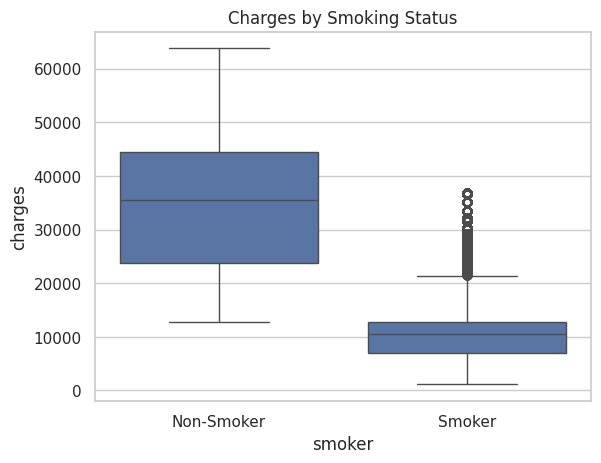

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

In [ ]:
# Fill missing values in Boolean columns with False, then convert to integer
for col in ['MI-ALL', 'STRAIN', 'Q-ISC']:
    df[col] = df[col].fillna(False).astype(int)

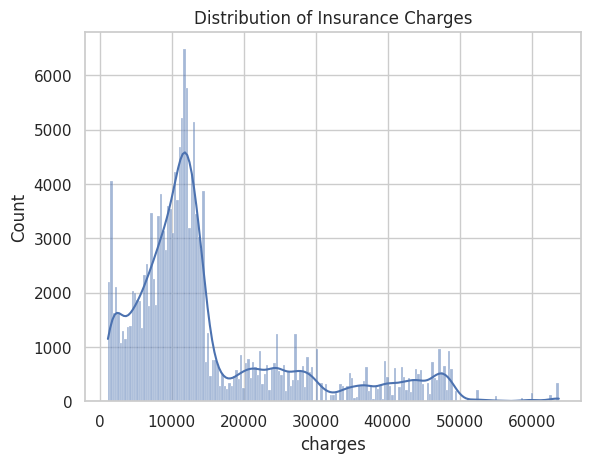

In [ ]:
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

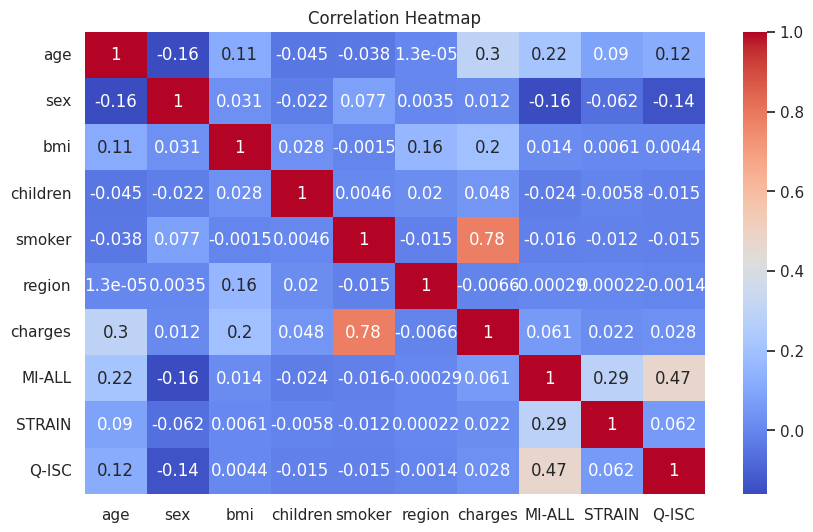

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

📊 Linear Regression Results:
Mean Absolute Error (MAE): ₹4135.07
Root Mean Squared Error (RMSE): ₹6037.06
R² Score: 0.7474


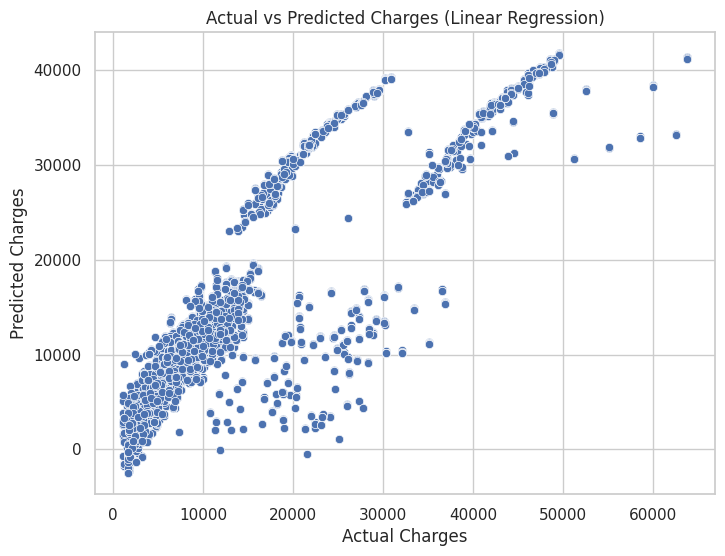

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = merged.copy()

df = df.dropna(subset=['bmi', 'charges'])

# Encode categorical features
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].astype('category').cat.codes
df['sex'] = df['sex'].astype(int)

for col in ['MI-ALL', 'STRAIN', 'Q-ISC']:
    df[col] = df[col].fillna(0) # Fill NaN with 0
    df[col] = df[col].astype(int) # Now convert to integer

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'MI-ALL', 'STRAIN', 'Q-ISC']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Results:")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Linear Regression)")
plt.grid(True)
plt.show()

In [ ]:
df['risk_class'] = (df['charges'] > df['charges'].median()).astype(int)  # 1 = High Risk, 0 = Low Risk

In [ ]:
df['MI-ALL'] = df['MI-ALL'].fillna(False).astype(int)
df['STRAIN'] = df['STRAIN'].fillna(False).astype(int)
df['Q-ISC'] = df['Q-ISC'].fillna(False).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df['MI-ALL'] = df['MI-ALL'].astype(int)
df['STRAIN'] = df['STRAIN'].astype(int)
df['Q-ISC'] = df['Q-ISC'].astype(int)

In [ ]:
X = df.drop(['charges', 'risk_class'], axis=1)
y = df['risk_class']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14771  1919]
 [ 1379 15348]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     16690
           1       0.89      0.92      0.90     16727

    accuracy                           0.90     33417
   macro avg       0.90      0.90      0.90     33417
weighted avg       0.90      0.90      0.90     33417



In [ ]:
y_binary = (y > y.median()).astype(int)

X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
risk_model = LogisticRegression(max_iter=1000)
risk_model.fit(X_train, y_train_binary)

# Save the model
import joblib
joblib.dump(risk_model, "xgb_classifier.pkl")

['xgb_classifier.pkl']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[14771  1919]
 [ 1379 15348]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     16690
           1       0.89      0.92      0.90     16727

    accuracy                           0.90     33417
   macro avg       0.90      0.90      0.90     33417
weighted avg       0.90      0.90      0.90     33417


Accuracy: 90.13%


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.13%


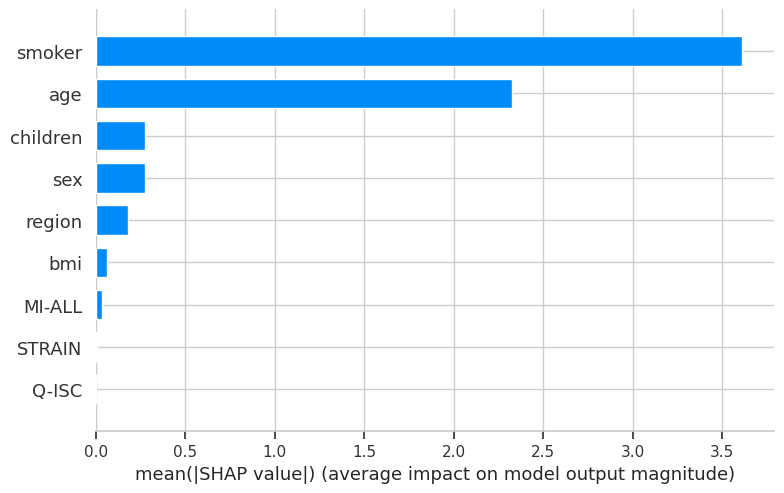

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a15cae52450c01a39444ed10d70366ec017425e157bca4560e80f9f580698195
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Low Risk', 'High Risk'],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[0].values,
    predict_fn=model.predict_proba
)
lime_exp.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
html_output = lime_exp.as_html()

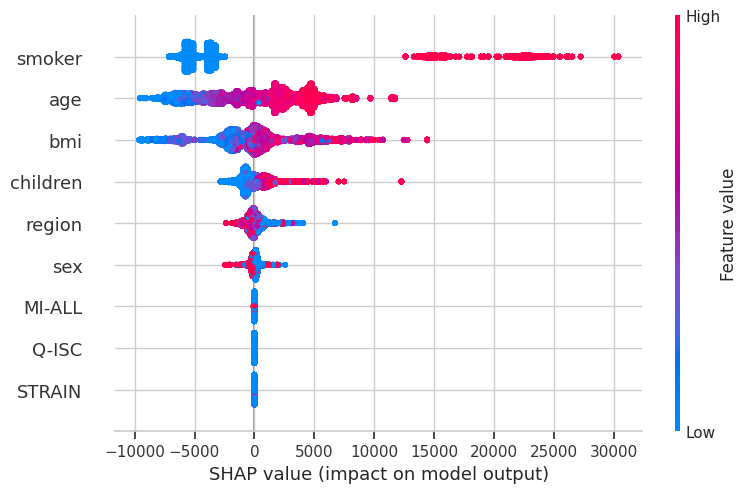

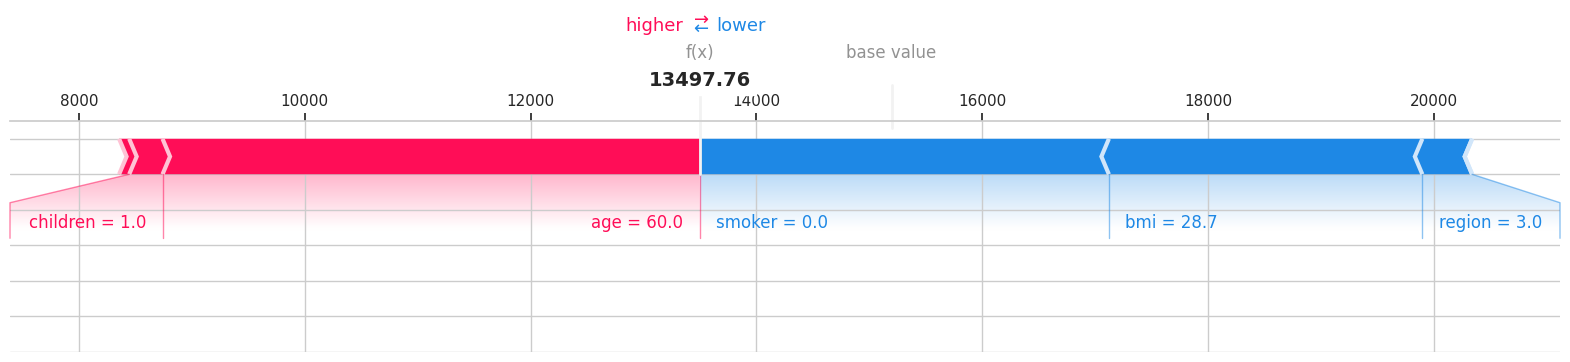

In [ ]:
import xgboost as xgb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = merged.copy()

df = df.dropna(subset=['bmi', 'charges'])
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].astype('category').cat.codes
df['sex'] = df['sex'].astype(int)

for col in ['MI-ALL', 'STRAIN', 'Q-ISC']:
    df[col] = df[col].fillna(0).astype(int)

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'MI-ALL', 'STRAIN', 'Q-ISC']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# 🔍 SHAP Explainability
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0].values,
    X_test.iloc[0],
    matplotlib=True
)

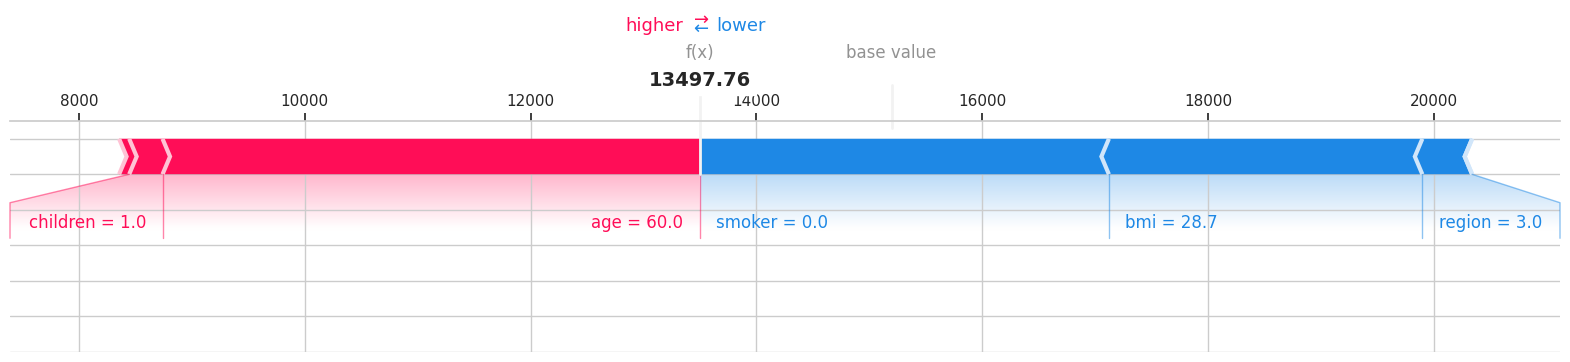

<Figure size 640x480 with 0 Axes>

In [ ]:
import joblib

joblib.dump(xgb_model, "xgb_regressor.pkl")

joblib.dump(explainer, "explainer.pkl")

import os
import matplotlib.pyplot as plt

os.makedirs("static", exist_ok=True)

shap.initjs()
shap.plots.force(shap_values[0], matplotlib=True)
plt.savefig("static/force_plot.png", bbox_inches="tight")

In [ ]:
from google.colab import files
files.download('static/force_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xgb_model.save_model("xgb_regressor.json")

In [ ]:
import joblib
joblib.dump(explainer, "explainer.pkl")

['explainer.pkl']